# Importing necessary modules

In [1]:
import re
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

## Loading Data

In [2]:
df = pd.read_csv("train.csv")
df.loc[[0,7,59,200,250]]

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
59,83,ablaze,"Edmonton, Alberta - Treaty 6",How the West was burned: Thousands of wildfire...,1
200,281,ambulance,VISIT MY YOUTUBE CHANNEL.,HAPPENING NOW - HATZOLAH EMS AMBULANCE RESPOND...,0
250,355,annihilation,NaN,U.S National Park Services Tonto National Fore...,0


# Features Explanation

<p>

<b>id </b>- a unique identifier for each tweet
    
<b>text </b>- the text of the tweet

<b>location </b>- the location the tweet was sent from (may be blank)

<b>keyword </b>- a particular keyword from the tweet (may be blank)

<b>target </b>- in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

</p>

### Data Info

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None


# Exploratory Data Analysis

## Class label 'target' Analysis

In [4]:
i=df['target'].isnull().sum()
print("Total {} null values and {} non-null values in Keyword feature".format(i,len(df)-i))

Total 0 null values and 7613 non-null values in Keyword feature


In [5]:
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

There are total 7613 Data Points. 4342 data points belongs to class 0(non-disaster) and 3271 data points belongs to class 1(disaster) 

##  'Keyword' feature Analysis

In [6]:
i=df['keyword'].isnull().sum()
print("Total {} null values and {} non-null values in Keyword feature".format(i,len(df)-i))

Total 61 null values and 7552 non-null values in Keyword feature


In [7]:
# filling null values with empty keyword
df['keyword']=df['keyword'].fillna(value='empty')

In [8]:
uniq_key=df["keyword"].unique()
print("No of Unique Keywords in Keyword Feature : {} \n\n".format(len(uniq_key)))
print(uniq_key)


No of Unique Keywords in Keyword Feature : 222 


['empty' 'ablaze' 'accident' 'aftershock' 'airplane%20accident'
 'ambulance' 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army'
 'arson' 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'
 'body%20bags' 'bomb' 'bombed' 'bombing' 'bridge%20collapse'
 'buildings%20burning' 'buildings%20on%20fire' 'burned' 'burning'
 'burning%20buildings' 'bush%20fires' 'casualties' 'casualty'
 'catastrophe' 'catastrophic' 'chemical%20emergency' 'cliff%20fall'
 'collapse' 'collapsed' 'collide' 'collided' 'collision' 'crash' 'crashed'
 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death'
 'deaths' 'debris' 'deluge' 'deluged' 'demolish' 'demolished' 'demolition'
 'derail' 'derailed' 'derailment' 'desolate' 'desolation' 'destroy'
 'destroyed' 'destruction' 'detonate' 'detonation' 'de

### Preprocessing keywords

In [9]:
from nltk.stem import WordNetLemmatizer
lemm=WordNetLemmatizer()
kywd=[re.sub('%20',' ',str(i)) for i in df['keyword']]
final_kywd=[]
for i in range(len(kywd)):
    if len(kywd[i].split()) <2:
        x=lemm.lemmatize(kywd[i],'v')
        x=lemm.lemmatize(x,'n')
        final_kywd.append(x)
    else:
        splitted=[]
        for word in kywd[i].split():
            x=lemm.lemmatize(word,'v')
            x=lemm.lemmatize(x,'n')
            splitted.append(x)
        final_kywd.append(' '.join(splitted))
df['keyword']=final_kywd            

### After preprocessing the keyword feature

In [10]:
uniq_key=df["keyword"].unique()
print("No of Unique Keywords in Keyword Feature : {} \n\n".format(len(uniq_key)))
print(uniq_key)


No of Unique Keywords in Keyword Feature : 178 


['empty' 'ablaze' 'accident' 'aftershock' 'airplane accident' 'ambulance'
 'annihilate' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'avalanche' 'battle' 'bioterror' 'bioterrorism'
 'blaze' 'bleed' 'blow up' 'blight' 'blizzard' 'blood' 'bloody' 'body bag'
 'bomb' 'bridge collapse' 'build burn' 'build on fire' 'burn' 'burn build'
 'bush fire' 'casualty' 'catastrophe' 'catastrophic' 'chemical emergency'
 'cliff fall' 'collapse' 'collide' 'collision' 'crash' 'crush' 'curfew'
 'cyclone' 'damage' 'danger' 'dead' 'death' 'debris' 'deluge' 'demolish'
 'demolition' 'derail' 'derailment' 'desolate' 'desolation' 'destroy'
 'destruction' 'detonate' 'detonation' 'devastate' 'devastation'
 'disaster' 'displace' 'drought' 'drown' 'dust storm' 'earthquake'
 'electrocute' 'emergency' 'emergency plan' 'emergency service' 'engulf'
 'epicentre' 'evacuate' 'evacuation' 'explode' 'explosion' 'eyewitness'
 'famine' 'fatal' 'fa

### Keywords and their document frequency

In [11]:
freq=df['keyword'].value_counts()
x=[]
y=[]
for word in freq.keys():
    x.append(word)
    y.append(freq[word])
    print("{} : {}".format(word,freq[word]))

flood : 109
body bag : 107
scream : 105
drown : 104
bomb : 101
fatality : 82
sink : 80
weapon : 78
evacuate : 76
wreck : 76
collide : 74
death : 74
derail : 73
blaze : 72
injury : 71
explode : 71
attack : 71
quarantine : 71
wound : 70
panic : 70
riot : 69
deluge : 69
casualty : 69
collapse : 69
destroy : 69
siren : 69
suicide bomb : 68
crush : 68
hostage : 68
burn : 67
crash : 67
electrocute : 66
blow up : 66
hijack : 65
survive : 65
obliterate : 62
demolish : 62
empty : 61
rescue : 57
forest fire : 51
armageddon : 42
harm : 41
damage : 41
twister : 40
fear : 40
windstorm : 40
outbreak : 40
wreckage : 39
flame : 39
earthquake : 39
famine : 39
sinkhole : 39
derailment : 39
explosion : 39
hellfire : 39
collision : 39
whirlwind : 39
fire : 38
hurricane : 38
typhoon : 38
oil spill : 38
fatal : 38
upheaval : 38
thunder : 38
ambulance : 38
ruin : 37
burn build : 37
blizzard : 37
pandemonium : 37
police : 37
mudslide : 37
sandstorm : 37
emergency : 37
debris : 37
bioterror : 37
curfew : 37
da

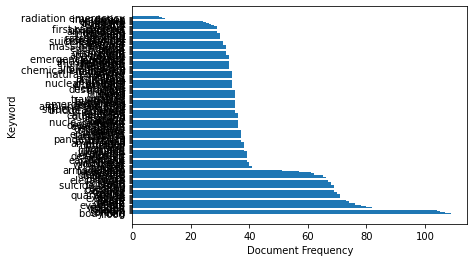

In [12]:
import matplotlib.pyplot as plt
plt.barh(x,y)
plt.xlabel("Document Frequency")
plt.ylabel("Keyword")
plt.show()

## 'Location' feature Analysis

In [13]:
i=df['location'].isnull().sum()
print("Total {} null values and {} non-null values in location feature".format(i,len(df)-i))

Total 2533 null values and 5080 non-null values in location feature


In [14]:
uniq_key=df["location"].unique()
print("No of Unique places in Location Feature : {} \n\n".format(len(uniq_key)))
print(uniq_key)


No of Unique places in Location Feature : 3342 


[nan 'Birmingham' 'Est. September 2012 - Bristol' ... 'Vancouver, Canada'
 'London ' 'Lincoln']


Lots of values are null in Location feature. Here we are dropping the Location column

In [15]:
df.drop('location',axis=1,inplace=True)

In [16]:
df.head(5)

,id,keyword,text,target
0,1,empty,Our Deeds are the Reason of this #earthquake M...,1
1,4,empty,Forest fire near La Ronge Sask. Canada,1
2,5,empty,All residents asked to 'shelter in place' are ...,1
3,6,empty,"13,000 people receive #wildfires evacuation or...",1
4,7,empty,Just got sent this photo from Ruby #Alaska as ...,1


## Text Feature Analysis

Text feature contains the tweets of users

In [17]:
i=df['text'].isnull().sum()
print("Total {} null values and {} non-null values in text feature".format(i,len(df)-i))

Total 0 null values and 7613 non-null values in text feature


##  Pre-processing tweets

### Original tweets

In [18]:
i=1
for line in df['text']:
    print("{} : {}".format(i,line))
    i+=1

1 : Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
2 : Forest fire near La Ronge Sask. Canada
3 : All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
4 : 13,000 people receive #wildfires evacuation orders in California 
5 : Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 
6 : #RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires
7 : #flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas
8 : I'm on top of the hill and I can see a fire in the woods...
9 : There's an emergency evacuation happening now in the building across the street
10 : I'm afraid that the tornado is coming to our area...
11 : Three people died from the heat wave so far
12 : Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I G

1783 : HTML5 Beginners Crash Course http://t.co/Y32oWBroVF #course http://t.co/Vr2U4cErW8
1784 : 'A slamming door and a lesson learned... I let another lover crash and burn'??
1785 : @SterlingKnight  Who had a car crashsterling!Who was driving in the carMel or JoeySterling Knight???????
1786 : @daewony0406 alright now I'm gonna crash I'm so exhausted
1787 : Party for Bestival crash victim Michael Molloy on what would have been his 21st http://t.co/BIkR8zzbhA
1788 : CLEARED: Crash in Hamilton on I-75 south at MM 459.
1789 : Deliver Value: A Cash Source Crash Course http://t.co/st5fGBLsYe #course http://t.co/0uK0H9hOzn
1790 : The Next Financial Crash. 'The Writing is on the Wall'. Don't Say 'You Weren't Warned' http://t.co/H7lDx29aba
1791 : am boy @Crash_______  https://t.co/f5Ylp7pfN7
1792 : Make man pikin crash ??????
1793 : #INCIDENT
Crash in Pascoe Vale South outbound on Tullamarine Fwy (CityLink) near Moreland Rd. Vehicles off in emergency lane. No delays.
1794 : I let another love 

2688 : Dorman 917-033 Ignition Knock (Detonation) Sensor Connector http://t.co/WxCes39ZTe http://t.co/PyGKSSSCFR
2689 : Detonation quotes - my esteemed belt quotes regarding each one recent: EseVU http://t.co/emzn4sPwNk
2690 : Do you want to play a game?
http://t.co/sQFp6Ecz0i
Its a GoogleMaps mashup that calculates the effects of the detonation of nuclear bomb
2691 : Look down upon three methods touching obtaing rank electrical transcription detonation: BuTIQOb
2692 : Ignition Knock (Detonation) Sensor-Senso fits 01-06 BMW 325Ci 2.5L-L6 http://t.co/gBVDNczjoU http://t.co/c211HISe0R
2693 : Ignition Knock (Detonation) Sensor-Senso Standard KS94 http://t.co/dY1erSDcRh http://t.co/m4cPmxmuRK
2694 : Ignition Knock (Detonation) Sensor-KNOCK SENSOR Delphi AS10004 http://t.co/LMrKgPOrcF http://t.co/6WAdNmsTOv
2695 : Ignition Knock (Detonation) Sensor Connector-Connecto MOTORCRAFT WPT-410 http://t.co/bSmJ2HVgwD http://t.co/bXalnEdy49
2696 : Ignition Knock (Detonation) Sensor-Senso BECK/ARNLEY 

3042 : #SCSeEstaPreparando Light mag. 4.4 earthquake  - - 73km SW of Khuzdar Pakistan on Wednes... http://t.co/i6lmcccLv5 via @volcanodiscover
3043 : #USGS M 1.2 - 23km S of Twentynine Palms California: Time2015-08-05 23:54:09 UTC2015-08-05 16:54:09 -07:0... http://t.co/kF0QYBKZOL #SM
3044 : @AGeekyFangirl14 's things she looks in a significant other:
1. Beautiful eyes.
2. Humor.
3. Farts that creates an earthquake.

????????
3045 : Nepal earthquake 3 months on: Women fear abuse https://t.co/iCTtZ0Divr via @@loupascale
3046 : ML 2.0 SICILY ITALY http://t.co/z6hxx6d2pm #euroquake
3047 : USGS reports a M1.94 #earthquake 5km S of Volcano Hawaii on 8/6/15 @ 1:04:01 UTC http://t.co/Njd28pg9Xv #quake
3048 : GNS sees unnecessary deaths resulting from earthquake strengthening legislation http://t.co/4rYZMzSgDW ($)
3049 : 'There was a small earthquake in LA but don't worry Emily Rossum is fine' #difficultpeople is great
3050 : USGS EQ: M 1.9 - 15km E of Anchorage Alaska: Time2015-08-06 00:11:16

5291 : Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... http://t.co/81HVV3N3rS
5292 : Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... http://t.co/2AO97o2a9D
5293 : Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disease in Edinburgh are to ...
5294 : Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... http://t.co/3sNyOOhseq
5295 : Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... http://t.co/VBsj8tniv1
5296 : Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legionnaires' disea... http://t.co/SO81Ab3a1x
5297 : Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak of Legio... http://t.co/uCBfgIBFOR #Muham

6040 : Exploration Takes Seismic Shift in #Gabon to #Somalia
http://t.co/Ltf6jL5keU http://t.co/Zlq8tHcTkW
6041 : New post from @SeismicSoftware: 3 Major Challenges of Channel Sales Enablement http://t.co/kWMRCEkVTF
6042 : Panoramic Resources cuts jobs after seismic event http://t.co/mUwmfJGzYh
6043 : ENGLAND EAST COAST. Dogger Bank Westward. 1. Seismic survey in progress by M/V Western Regent towing a 8400 metre long cable within areaÛ_
6044 : A subcontractor working for French seismic survey group CGG has been kidnapped in Cairo and is held by Islamic State the company said on WÛ_
6045 : The Art World's Seismic Shift Back to the Oddball - Observer http://t.co/W0xR5gP8cW
6046 : #Sismo DETECTADO #JapÌ_n 06:32:43 Miyagi Estimated seismic intensity 0 JST #??
6047 : Sinkhole Selfies: You Wont Believe What's In The Brooklyn Sinkhole!: 
        Sinkhole Selfies: You Wont Belie... http://t.co/A3b5n3rcr5
6048 : MRW when a sinkhole opens up beneath my friends and I... #gif #funny #lol #comed

6474 : Hasn't quite sunk in that I saw Johnny Marr and Primal Scream all in the space of a few hours on Sunday
6475 : @CodeMeW Were you opening regular or master packs? RT: soÛ_ sunkÛ_1 mil credits into light sideÛ_ didn't pullÛ_oneÛ_you sure about those odds?
6476 : Yup. Still hasn't sunk in. ?? https://t.co/Ii2SpVP89b
6477 : @SaintRobinho86 someone has to be at the bottom of every league. Tonight clearly demonstrated why the Lions are where they are - sunk!
6478 : It still hasn't sunk in that I've actually met my Idol ????
6479 : @UntamedDirewolf 'I... Wow. Alright.' Sansa shook her head and blinked rapidly as the new information sunk in. 'I really don't know what--
6480 : @BenAffleck  i respected you and liked you for your talent. i guess i stil do but as a human being you've sunk low Mr.Affleck!
6481 : Once upon a time the fact that I decided to go to university 7 hours away actually sunk in
6482 : #ArrestpastorNganga it so worrying 2 see how some police officers in Kenya have

## After Preprocessing

In [19]:
ndf=pd.read_csv("clean_train.csv")
ndf.dropna(inplace=True)
count = 1
for i in ndf['text']:
    print(str(count)," : ",i)
    count += 1

1  :  deed reason earthquake may allah forgive
2  :  forest fire near ronge sask canada
3  :  resident ask helter place notify officer no evacuation shelter place order expect
4  :  people receive wildfire evacuation order california
5  :  get send photo ruby alaska smoke wildfire pour school
6  :  rockyfire update california hwy close direction due lake county fire cafire wildfire
7  :  flood disaster heavy rain cause flash flood street manitou colorado spring area
8  :  top hill see fire wood
9  :  emergency evacuation happen build across street
10  :  afraid tornado come area
11  :  three people die heat wave far
12  :  haha south tampa get flood hah wait second live south tampa gonna gonna fvck flood
13  :  rain flood florida tampabay tampa day lose count
14  :  flood bago myanmar arrive bago
15  :  damage school bus multi car crash break
16  :  man
17  :  love fruit
18  :  summer lovely
19  :  car fast
20  :  gooaal
21  :  ridiculous
22  :  london cool
23  :  love ski
24  :  wonde

358  :  minor citation possesion decriminalize substance not face time
359  :  suspect serial arsonist arrest calif
360  :  legal system never forget
361  :  dick
362  :  bloor ossington arsonist also burn mattress northumberland cbcto
363  :  arsonist
364  :  not anything nice say come sit
365  :  vegetarian vegan video show arsonist torch popular restaurant strictly vegetarian govegan uniteblue
366  :  arsonist arrest set many fire watch tonight headline nightbeat minutemix
367  :  video capture man remove american flag long beach home burn arsonist seek
368  :  trick think nasty thing
369  :  spotlight take paradise arsonist wniagospel
370  :  make
371  :  town salem melt ice cube arsonist
372  :  arsonist blame blaze plastic recycle business adelaide report newsadl
373  :  hotboy shit
374  :  zodiac girl feat trey dupree produce sparkz beatz chuck arsonist
375  :  lmfao
376  :  allege east bay serial arsonist arrest sanfrancisco
377  :  jokin still cant move
378  :  guess say shit 

1058  :  two giant crane hold bridge collapse nearby home
1059  :  icymi ash australia collapse trent bridge twitter react
1060  :  warne shock australia epic collapse trent bridge johannesburg aug ani legendary australian
1061  :  need know suppose throw bridge collapse plan parade no
1062  :  injure miss bridge collapse central mexico fox news latino
1063  :  two giant crane hold bridge collapse nearby home via
1064  :  traintragedy happen due collapse bridge afraid take long distance train
1065  :  listen blower tuffers aussie bat collapse trent bridge remind love wonderful stuff engvaus
1066  :  computer gadget two giant crane hold bridge collapse nearby home slingnews
1067  :  australia ash disaster collapse unfold trent bridge telegraph
1068  :  urgentthere currently storey build church stop oworoshoki third mainland bridge likely collapse
1069  :  ash australia collapse trent bridge among worst history england bundle australia
1070  :  ash australia collapse trent bridge twitter

1189  :  flame visible fire tucson mountain lightning cause fire burn steep rocky terrain mountain
1190  :  burn like neon light
1191  :  not modest certainly sniff sniiff donny something burn
1192  :  burn legion return
1193  :  bar method integrate fat burn format interval train muscle shape techniqu
1194  :  bore life not get every morning burn desire thing not enough goal lou holtz
1195  :  hand burn
1196  :  uhh demon hunter not whole burn crusade thing
1197  :  play boat club memory london burn web radio
1198  :  rip world burn
1199  :  many stack burn apply
1200  :  parent take kid burn man one year old think better
1201  :  haha would say hot ball burn
1202  :  put fire still burn
1203  :  counter act burn alexandrian library
1204  :  california burn gov jerry brown tell reporter press conference california experience
1205  :  not pay attention influencers burn money socialtimes
1206  :  completely understand wake like minute ago burn
1207  :  ika tune soup diet recipe fat burn

1400  :  google alert emergency unit simulate chemical explosion
1401  :  downtown emergency service center hire chemical dependency counselor intern seattle apply job
1402  :  plan case pool chemical emergency learn watersafety
1403  :  need include emergency plan chemical plant see also
1404  :  emergency unit simulate chemical explosion suppose student research lab northwestern
1405  :  know bad not give pressure short term profit chemical company
1406  :  nueva favorita emergency feat chemical brother bit
1407  :  downtown emergency service center hire chemical dependency counselor intern apply seattle job
1408  :  chemical spill cleanup video prepare emergency situation lab
1409  :  day liquidation emergency chemical object usar usar ruor
1410  :  emergency unit simulate chemical explosion evanston
1411  :  please stand profit hungry chemical company keep ban savebees sign petition
1412  :  fortunately rework plumb emergency chemical shower draw glitter pipe occasion
1413  :  fami

2171  :  israel continue demolition palestinian home gop potus irandeal isi
2172  :  best grill fkn pleb
2173  :  last chance work old ffa foodstand fairground finish demolition help would appreciate
2174  :  think get demo car friend join demolition derby kenosha
2175  :  like ahh fix alec make state med tort work comp law lead injustice
2176  :  really need tone weight room demolition cont
2177  :  giveaway music kit dren death head demolition
2178  :  kaduna begin demolition build govt school land
2179  :  dont think paint lab build cause plan demolition since forever
2180  :  bring back demolition head quarter
2181  :  china detain seven christian try protect church cross demolition
2182  :  house save demolition move orca island washington
2183  :  seven chinese christian detain amid widespread anger cross demolition
2184  :  christian detain zhejiang amid widespread anger cross removal cross remove since last
2185  :  san jose demolition willow glen trestle put legal battle conti

2474  :  look upon three method touch obtaing rank electrical transcription detonation butiqob
2475  :  ignition knock detonation sensor senso fit bmw
2476  :  ignition knock detonation sensor knock sensor delphi
2477  :  ignition knock detonation sensor senso beck arnley
2478  :  detonation realistic asset enter india koz
2479  :  new smp ignition knock detonation sensor
2480  :  new fashion lady gold watch waterproof weiqin famous brand michel quartz lujo
2481  :  ignition knock detonation sensor senso beck arnley
2482  :  ignition knock detonation sensor acdelco original equipment
2483  :  new favorite trivium detonation soundcloud
2484  :  not miss chris appy detonation myth obscure crime hiroshima ago month
2485  :  detonation fashionable mountaineer electronic watch water resistant couple leisure tab
2486  :  ignition knock detonation sensor senso standard fit acura rsx
2487  :  detonation fashionable mountaineer electronic watch water resistant couple leisure tab
2488  :  igniti

3152  :  press twitch head explode
3153  :  toronto crazy blue jay imagine leaf get good city might literally explode
3154  :  chick masturbate guy get explode face
3155  :  even admit seras sasha cute peice explode sidewalk
3156  :  kakeru teduka bfore year today hiroshima explode one atomic bomd sad day
3157  :  tin tesco dog food explode prompt complaint via pet dog animal puppy
3158  :  break fully explode
3159  :  dead two love photo heart explode million piece
3160  :  dress meme officially explode internet
3161  :  final medinah update shoot front explode back imkeepingmydayjob pic famous
3162  :  well chaning ipad screen fuck explode glass place look like job need new one
3163  :  dress meme officially explode internet
3164  :  little heart explode otrametlife mtvhottest one direction
3165  :  junko year old atomic bomb explode hiroshima august
3166  :  saw man whose mind explode drako zarharzar day
3167  :  read break hour twitter notice though nothing worry twitter not explod

3354  :  jay big pun biggie wrap zero question fatality flawless victory
3355  :  cuddle right
3356  :  savage leak thomas brady gangstermail account wonder quick fatality samsung mobile real son
3357  :  like video vabengal fatality captain falcon
3358  :  hibernate pbx irrespective pitch fatality careerism pan crbzfz
3359  :  fatality
3360  :  die lyme disease case fatality rate nearly
3361  :  fatality like corpse still jittering
3362  :  wow fatality big rig hit motorcyclist blood everywhere wow sick
3363  :  nah hit homie wit fatality son wit babality cold cold fuck lmfaoo
3364  :  kosciusko police investigate pedestrian fatality hit train thursday
3365  :  yes life fatality rate
3366  :  many basket charm fatality get mystery paranormal
3367  :  make bad boy must see
3368  :  need team need one
3369  :  afghan soldier kill general america highest rank fatality since vietnam
3370  :  usually never happen
3371  :  cat fatality utica pleasant holland ave black cat white paw average 

3566  :  flatten machida lose fight nope lose fight guy not lose also
3567  :  floor flatten early bird get cup lag bout pun dock watch ppl drink
3568  :  conklin flatten shuffle foot instead kick slide not get hand chest
3569  :  flatten thee striker
3570  :  pick flatten hay men masonite wahpeton
3571  :  zouma flatten guy
3572  :  fylde build set flatten one preston city centre iconic build disappear skyline
3573  :  hide kid hide wife loose think flatten ball
3574  :  would great mbiwa flatten little rat
3575  :  puck flatten ball lol
3576  :  not doubt implicit statement make want flatten bus
3577  :  flatten raynor raynor bald imperfect biker marine not emo generic western hero
3578  :  think risk lose get nose flatten lot
3579  :  mum literally pick new car today flatten battery already try sort bluetooth muppet
3580  :  notley flatten harper heartland harper import ten thousand tfw slave cost albertans job
3581  :  flatten frog
3582  :  imagine get flatten kurt zouma
3583  :  f

3854  :  eden hazard harden spot flop identical
3855  :  rate hazard highly fanboys among worst account twitter
3856  :  not bad personally would get rid either hazard aguero better striker berahino
3857  :  choke hazard prompt recall kraft cheese single
3858  :  break arsenal hector bellerin arrest question regard disappearance eden hazard
3859  :  freak accident sure look someone blame maybe remember player break leg cuz cart back end zone common sense
3860  :  december court dismiss group charge rape victim say get rap occupational hazard military isi
3861  :  bmw emergency warn hazard switch button oem
3862  :  kenya news chelsea talisman eden hazard keen match cristiano ronaldo lionel messi mipasho
3863  :  biggest lead hazard new england history yeah let nail guy
3864  :  fire would safety hazard
3865  :  precious cargo onesie recall choke hazard
3866  :  alright hazard willian not gonna shift easily
3867  :  hazard high traffic area dean bridge
3868  :  battlefield funny moment 

4492  :  guess ill never able mayhem
4493  :  like video gun range mayhem
4494  :  editor chief release issue ramag fashion model mayhem
4495  :  seem like page order
4496  :  tonight mayhem playthursdays everybody free text
4497  :  mayhem beautiful
4498  :  read right leave
4499  :  anyone else think stephen sound like andy dick get excite difference actually like stephen masterchef
4500  :  nosurrender result full metal mayhem world title match bully ray take career come end
4501  :  well know lol
4502  :  tbt time best friend panic disco
4503  :  magic city mayhem kissimmee adventure aug
4504  :  retweet follow followback gain follow mention
4505  :  real hero rip brave heart
4506  :  campaign ferrell zach galifianakis commit comic mayhem hilarious political farce
4507  :  asbury park shoot report via
4508  :  see lot ask pitchwars ask magic realism not fantasy diff
4509  :  best mind clear content observation day
4510  :  bite venture choose suitable music mayhem
4511  :  break au

4687  :  also not mistake sit right next nuclear reactor not smart cataclysmic event reator melt
4688  :  would cry nuclear reactor cool tank winechat
4689  :  magnetic electrostatic nuclear fusion reactor
4690  :  no expert raw uranium nuclear reactor fuel rod different creature
4691  :  finnish minister fennovoima nuclear reactor ahead via worldnews
4692  :  roll sandunes gentle lap sea call gull nuclear reactor sizewell
4693  :  finnish nuclear plant move ahead finance secure via
4694  :  energy department offer mln new nuclear reactor design sputnik international
4695  :  little film inside nuclear reactor chernobyl
4696  :  salem nuclear reactor shut electrical circuit failure pump
4697  :  finnish minister fennovoima nuclear reactor ahead worldnews news breakingnews
4698  :  finnish minister fennovoima nuclear reactor ahead
4699  :  aug fort calhoun nuclear station capacity today accord nrc
4700  :  besides would rather shut whole nuclear reactor maintenance wind turbine time
470

4905  :  already panic cry stress nice
4906  :  people finally panic cable
4907  :  not bad haha would panic tho
4908  :  nah man panic find brother wife debbie hospital stress
4909  :  panic maybe bff leave china bar maybe tindering toilet min
4910  :  may panic little not fast submit form usually
4911  :  panic make tire want sleep bed
4912  :  yet brit panic
4913  :  scar scream panic redeemer romanticsuspense
4914  :  dad panic weight loss mean need hurry new clothe fundwhen reach goal
4915  :  already panic school start
4916  :  feel like panic idk get result back week alarmingly calm
4917  :  realize maybe not normal sit front uber driver panic
4918  :  see people panic orpik
4919  :  fully panic lol
4920  :  let drive truck start panic flip bitch
4921  :  not gonna lie panic little bite vic hardy not freeman not practice
4922  :  stop panic
4923  :  sit cam panic
4924  :  people panic result day though hahahah like worry change result
4925  :  america say war terrorism police ta

5201  :  kill val riot emmerdale
5202  :  money cannot buy happiness lie tell poor people keep riot
5203  :  bloody hell already upgrade riot hyperbole saintsfc
5204  :  twitter count riot financial collapse brazil rio
5205  :  would black dude antioch would riot
5206  :  recently meet discus race relation america benefit riot loveislove
5207  :  people like charge inevitable riot contribute lie
5208  :  cindy noonan baltimore riot yahistorical undergroundrailraod
5209  :  leeds fan riot embra lower tier league cup final dee dum
5210  :  still riot couple hour leave class
5211  :  plenty black people riot tosu win championship well
5212  :  ferguson riot work next time say riot not change anything fix
5213  :  bbcnews british insurer say riot cost insurer million police number reduce blind fat contr
5214  :  bhramabull watch run jewel use fact defend riot ferguson socially mind duo take
5215  :  think twitter invent keep insomniac riot wee small hour
5216  :  people not riot justice se

5715  :  investigator say virgin galactic spaceship crash cause structural failure pilot unlock brake system
5716  :  course not melt steel order cause structural failure
5717  :  cap drive act represent failure senate republican address structural shortfall plague highway trust fund
5718  :  photo failure structural integrity affect whether barn raise upon faulty concrete
5719  :  sabotage rule structural failure
5720  :  cause federal failure deeply structural not easily solve
5721  :  slum manifestation state failure provide house citizen illegality discourse confound structural problem stopevictions
5722  :  structural problem rather failure competence traditional soc democratic party
5723  :  jet fuel cant melt steel structural failure illogical second plane crash build fake bomb
5724  :  virgin galactic crash early unlock brake trigger structural failure crash virgin galactic
5725  :  investigator rule catastrophic structural failure result virg relate article
5726  :  ntsb virgi

6019  :  flash thunder quick amazon kindle soon print amazon book via create via
6020  :  thunder shake house wake sister make car alarm
6021  :  hear lighten see thunder
6022  :  dream peacefully loud thunder want scare
6023  :  brother cry cause thunder lmao
6024  :  udest thunder ever hear
6025  :  snow thunder lightning
6026  :  thunder legit
6027  :  shit rly sheet aand thunder lightning miss summer storm
6028  :  mama scar thunder
6029  :  please please gotta listen essenceofme thunder major back
6030  :  suddenly gloomy thunder loud shake window not ever bay area miss lol
6031  :  thunder outside house afternoon gawx
6032  :  oklahoma thunder durant nba adidas oklahoma city thunder youth large swingman jersey retail nba durant
6033  :  hear thunder
6034  :  love sound thunder rumble across mountain
6035  :  glad save want steal thunder
6036  :  severe thunderstorm warn oklahoma county radar okwx
6037  :  nigga play thunderstorm hope lorr bless
6038  :  advice noah dont run thund

6246  :  reddit new content policy show maybe reddit cannot via
6247  :  stunningly poor defense not pitcher bat mia like top inning team trouble
6248  :  frickin summer humidity build cause trouble
6249  :  trouble get motivate remember time pas regret make way around matthew donnelly
6250  :  nothing trouble lil wayne charlie puth
6251  :  trouble mental fog consider test
6252  :  feel lucky
6253  :  hurricane tornado tsunami someone please tell hell happen nopower
6254  :  godslove thanku sister helene new video come apocalyptic earthquake tsunami
6255  :  godslove thanku brother danny new video come apocalyptic earthquake tsunami
6256  :  baan thai tsunami sushi washington
6257  :  keep wet like tsunami
6258  :  bbshelli seem pretty sure one stay
6259  :  crptotech tsunami bank bank tech bitcoing blockchain
6260  :  sing tsunami beginner computer tutorial everyone want learn build
6261  :  senior year wanna
6262  :  optical illusion cloud roll mountain look like tsunami geneva swit

6520  :  abe pledge make every effort seek world without nuclear weapon
6521  :  something place prevent skynet perhaps
6522  :  adamantly oppose nuclear weapon
6523  :  pay photo safari no weapon allow otherwise like kill something
6524  :  slightly not help suh wake practice think get lot weapon finsup
6525  :  no idea mean look violent crime rate without weapon ban gun become like mexico not australia
6526  :  death certificate safe weapon tesla def con security
6527  :  navy no charge officer weapon violation chattanooga attack
6528  :  reagan administration arrange israeli weapon send guatemalan army
6529  :  memory victim hiroshima nagasaki never ban nuclear weapon
6530  :  hey love bird get submission whirlwind wed war fantastic keep send guy
6531  :  stand alone not piss moan choice make must reap whirlwind demeanor calm staid
6532  :  quarter whirlwind not see come
6533  :  help whirlwind nostalgia
6534  :  sit cafe enjoy bite cram meet whirlwind hour nyc
6535  :  weather fore

In [20]:
(ndf.target).value_counts()

0    4033
1    2806
Name: target, dtype: int64

After preprocessing, there are total 6839 Data Points. 4033 data points belongs to class 0(non-disaster) and 2806 data points belongs to class 1(disaster) 

## Getting word count in tweets and total unique words

In [21]:
words_list=[]
word_count=[]
for line in list(ndf['text']):
    word_count.append(len(line.split()))
    words_list.extend(line.split())

In [22]:
print("There are total {} unique words".format(len(set(words_list))))

There are total 11095 unique words


## Word Distribution of tweets

## Complete Data

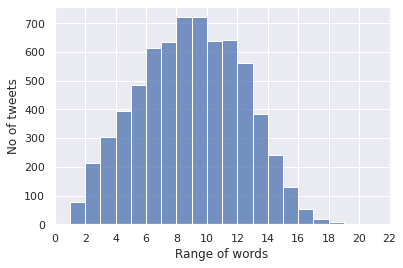

In [23]:
count_df = pd.DataFrame(word_count,columns=['text'])
count_df['Class'] = [str(int(i)) for i in ndf['target']]
sns.set_theme()
sns.histplot(data=count_df, x="text",bins = 20)
plt.xticks(np.arange(0, 23, step=2))
plt.xlabel("Range of words")
plt.ylabel("No of tweets")
plt.savefig("word_dist.jpg")
plt.show()

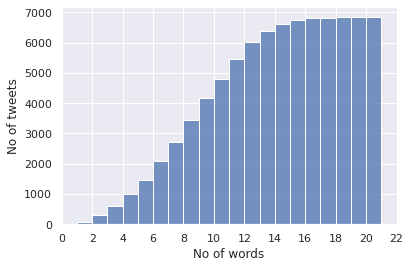

In [24]:
sns.set_theme()
sns.histplot(data=count_df, x="text",bins = 20,cumulative = True)
plt.xticks(np.arange(0, 23, step=2))
plt.xlabel("No of words")
plt.ylabel("No of tweets")
plt.savefig("word_cumsum.jpg")
plt.show()

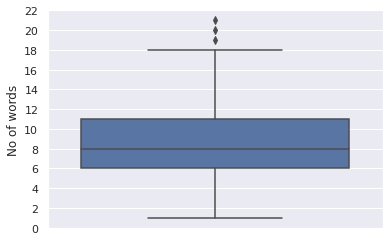

In [25]:
sns.set_theme()
sns.boxplot(data=count_df, y="text")
plt.yticks(np.arange(0, 23, step=2))
plt.ylabel("No of words")
plt.savefig("word_box.jpg")
plt.show()

## Class-wise

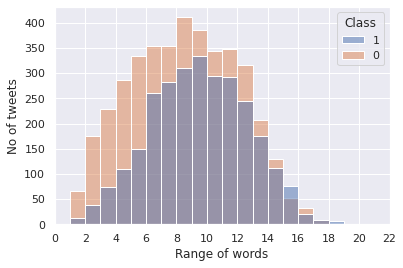

In [26]:
sns.set_theme()
sns.histplot(data=count_df, x="text",bins = 20,hue = 'Class')
plt.xticks(np.arange(0, 23, step=2))
plt.xlabel("Range of words")
plt.ylabel("No of tweets")
plt.savefig("word_dist_class.jpg")
plt.show()

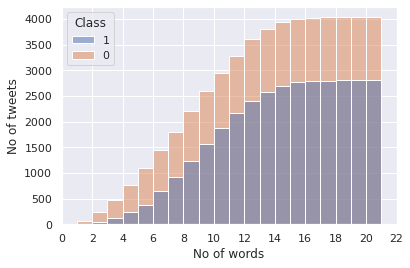

In [27]:
sns.set_theme()
sns.histplot(data=count_df,cumulative=True, x="text",bins = 20,hue = 'Class')
plt.xticks(np.arange(0, 23, step=2))
plt.xlabel("No of words")
plt.ylabel("No of tweets")
plt.savefig("word_cumsum_class.jpg")
plt.show()

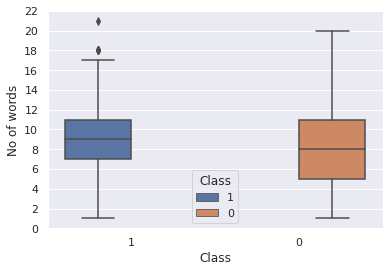

In [28]:
sns.set_theme()
sns.boxplot(data=count_df, y = 'text', x ='Class' ,hue = 'Class')
plt.yticks(np.arange(0, 23, step=2))
plt.ylabel("No of words")
plt.savefig("word_box_class.jpg")
plt.show()

### Key Observations

<p>

1. 50% tweets have less than 9 words.
2. There are very less tweets that have more than 18 words.
3. 50 % of the Disaster tweets have 7 to 11 words.
4. 50 % of the Non-Disaster tweets have 5 to 11 words.
5. Disaster class has very less tweets having words more than 17.
   

</p>

In [29]:
print("Minimum length of tweet {} and maximum length of tweet {}".format(min(word_count), max(word_count)))

Minimum length of tweet 1 and maximum length of tweet 21


In [30]:
# Creating vocabulary
vocab=set(words_list)
len(vocab)

11095

## Creating word count dictionary

In [31]:
word_count_dict={}
for word in vocab:
    word_count_dict[word]=words_list.count(word)
# sorting dictionary by words
import operator
sorted_word_count=dict(sorted(word_count_dict.items(), key=operator.itemgetter(1),reverse=True))

In [32]:
sorted_word_count

{'not': 639,
 'get': 407,
 'like': 386,
 'fire': 339,
 'no': 254,
 'one': 202,
 'bomb': 191,
 'say': 188,
 'would': 184,
 'new': 183,
 'via': 182,
 'people': 181,
 'news': 177,
 'burn': 175,
 'time': 174,
 'make': 173,
 'emergency': 154,
 'video': 152,
 'flood': 151,
 'build': 151,
 'come': 151,
 'day': 149,
 'see': 148,
 'kill': 147,
 'crash': 145,
 'year': 143,
 'look': 140,
 'know': 137,
 'think': 134,
 'police': 133,
 'body': 132,
 'love': 130,
 'disaster': 128,
 'take': 125,
 'storm': 122,
 'attack': 122,
 'back': 121,
 'want': 116,
 'man': 114,
 'death': 113,
 'world': 111,
 'still': 107,
 'home': 106,
 'bag': 106,
 'collapse': 105,
 'car': 104,
 'scream': 104,
 'first': 103,
 'train': 102,
 'let': 102,
 'live': 99,
 'need': 99,
 'cannot': 97,
 'nuclear': 97,
 'drown': 97,
 'wreck': 95,
 'california': 95,
 'today': 94,
 'work': 94,
 'watch': 92,
 'fuck': 91,
 'dead': 91,
 'accident': 91,
 'suicide': 89,
 'good': 89,
 'way': 88,
 'plan': 88,
 'cause': 88,
 'destroy': 86,
 'help': 

## Creating wordcloud

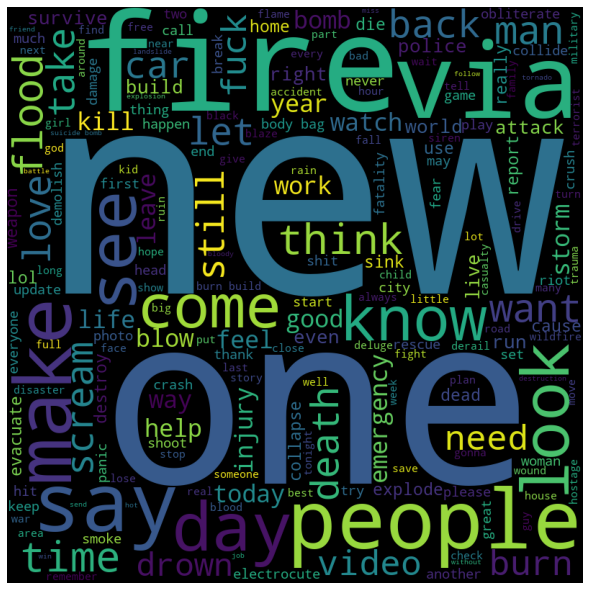

In [33]:
full_str=''
for line in ndf['text']:
    full_str+=line+' '
from wordcloud import WordCloud, STOPWORDS 
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 1).generate(full_str) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig("wordcloud.jpg")
plt.show() 